# Using groupby in Pandas
Use this method when you want to collapse a dataframe by a categorical column and run an aggregation. For example, if you had a list of alcohol consumption by country, and you wanted to know the average consumed **for each** continent. Let's look at that example.

#### Load python tools

In [1]:
import pandas as pd

#### Read sample dataset

In [2]:
df = pd.read_csv('https://bit.ly/drinksbycountry')

#### What's that dataframe look like? 

In [3]:
df.head()

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
0,Afghanistan,0,0,0,0.0,Asia
1,Albania,89,132,54,4.9,Europe
2,Algeria,25,0,14,0.7,Africa
3,Andorra,245,138,312,12.4,Europe
4,Angola,217,57,45,5.9,Africa


#### How many records, or countries? 

In [4]:
len(df)

193

#### How many countries in each continent? 

In [7]:
df.value_counts('continent')

continent
Africa           53
Europe           45
Asia             44
North America    23
Oceania          16
South America    12
dtype: int64

---

#### What's the average beer servings in all countries? 

In [8]:
df['beer_servings'].mean()

106.16062176165804

#### But what about **for each** continent? 

In [10]:
df.groupby(["continent"])["beer_servings"].mean()

continent
Africa            61.471698
Asia              37.045455
Europe           193.777778
North America    145.434783
Oceania           89.687500
South America    175.083333
Name: beer_servings, dtype: float64

#### You're basically doing this, but **for each** continent

In [11]:
df[df['continent'] == "Africa"]["beer_servings"].mean()

61.471698113207545

#### Or ... 

In [12]:
df[df['continent'] == "North America"]["beer_servings"].mean()

145.43478260869566

#### Remember, you can filter a dataframe — in this case to see each country in North America:

In [16]:
north_america=df[df["continent"] == "North America"]

#### Which countries consume the most beer? 

In [20]:
north_america.sort_values("beer_servings", ascending = False).head()

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
130,Panama,285,104,18,7.2,North America
17,Belize,263,114,8,6.8,North America
184,USA,249,158,84,8.7,North America
32,Canada,240,122,100,8.2,North America
109,Mexico,238,68,5,5.5,North America


#### Or total litres of alcohol

In [23]:
north_america.sort_values("total_litres_of_pure_alcohol", ascending = False).head()

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
68,Grenada,199,438,28,11.9,North America
144,St. Lucia,171,315,71,10.1,North America
184,USA,249,158,84,8.7,North America
32,Canada,240,122,100,8.2,North America
143,St. Kitts & Nevis,194,205,32,7.7,North America


---

#### Back to groupby: You can use other aggregation methods, too

In [24]:
df.groupby(["continent"])["beer_servings"].max()

continent
Africa           376
Asia             247
Europe           361
North America    285
Oceania          306
South America    333
Name: beer_servings, dtype: int64

In [25]:
df.groupby(["continent"])["beer_servings"].min()

continent
Africa            0
Asia              0
Europe            0
North America     1
Oceania           0
South America    93
Name: beer_servings, dtype: int64

#### Which country drinks the most beer?

In [29]:
df[df["beer_servings"] == df["beer_servings"].max()]

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
117,Namibia,376,3,1,6.8,Africa


In [35]:
df[df["continent"]== "Asia"].sort_values("total_litres_of_pure_alcohol", ascending = False).head()

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
141,Russian Federation,247,326,73,11.5,Asia
138,South Korea,140,16,9,9.8,Asia
85,Japan,77,202,16,7.0,Asia
87,Kazakhstan,124,246,12,6.8,Asia
169,Thailand,99,258,1,6.4,Asia


#### Spirits?

In [38]:
df[df["total_litres_of_pure_alcohol"]== df["total_litres_of_pure_alcohol"].max()]

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
15,Belarus,142,373,42,14.4,Europe


---

#### There's another method allowing more agg types

In [44]:
df.groupby(["continent"])["beer_servings"].agg(["min","max", "count", "mean"]).reset_index()

,continent,min,max,count,mean
0,Africa,0,376,53,61.471698
1,Asia,0,247,44,37.045455
2,Europe,0,361,45,193.777778
3,North America,1,285,23,145.434783
4,Oceania,0,306,16,89.687500
5,South America,93,333,12,175.083333


#### You can define a groupby as a variable, if you want

In [47]:
continents= df[df["beer_servings"] == df['beer_servings'].max()]

#### You can also stick to one aggregation method but use if for all your numerical columns

In [48]:
df.groupby(["continent"]).mean().reset_index()

,continent,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol
0,Africa,61.471698,16.339623,16.264151,3.007547
1,Asia,37.045455,60.840909,9.068182,2.170455
2,Europe,193.777778,132.555556,142.222222,8.617778
3,North America,145.434783,165.739130,24.521739,5.995652
4,Oceania,89.687500,58.437500,35.625000,3.381250
5,South America,175.083333,114.750000,62.416667,6.308333


#### Assign that to a variable

In [49]:
all_drinks=df.groupby(["continent"]).mean().reset_index()

#### And even plot it if you want

<AxesSubplot:>

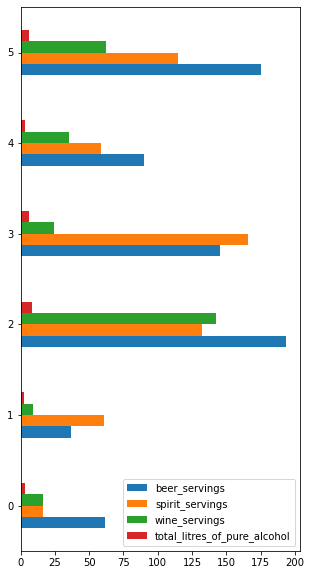

In [51]:
all_drinks.plot(kind="barh", figsize=(5,10))

<AxesSubplot:ylabel='test'>

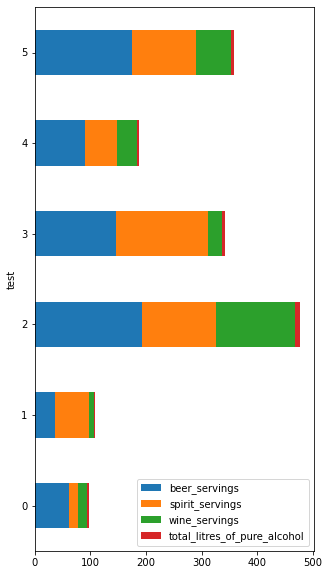

In [53]:
all_drinks.plot(kind="barh", stacked = True, figsize=(5,10), xlabel = "test")